In [14]:
import os 
from dotenv import load_dotenv

load_dotenv()

True

In [15]:
os.environ["OPEN_AI_KEY"] = os.getenv("OPEN_AI_KEY")
os.environ["OPENAI_API_VERSION"] = os.getenv("OPENAI_API_VERSION")
os.environ["AZURE_OPENAI_ENDPOINT"] = os.getenv("AZURE_OPENAI_ENDPOINT")

In [16]:
from langchain_openai import AzureChatOpenAI

llm = AzureChatOpenAI(model="gpt-4o", api_key=os.getenv("OPEN_AI_KEY"), api_version=os.getenv("OPENAI_API_VERSION"))

In [17]:
from langchain_core.messages import HumanMessage

messages = [HumanMessage("who is the father of google")]
llm.invoke(messages)

AIMessage(content='The term "father of Google" is commonly associated with Larry Page and Sergey Brin. They are the co-founders of Google and developed the search engine as part of their research project while studying at Stanford University in the late 1990s. Larry Page and Sergey Brin launched Google in September 1998, and it has since grown into one of the largest and most influential technology companies in the world.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 84, 'prompt_tokens': 13, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-05-13', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BTgIRfZ7HDEY7gPLamDywvU1nBS3V', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'f

In [18]:
from typing_extensions import TypedDict

class QueryState(TypedDict):
    query:str


In [ ]:
class PostgresDb():

    def __init__(self, client):
        self.client = client
    

    def fetch_all_tables():
        return {"tables":""}
    
    def fetch_all_relations():
        return {"tables":""}
    
    def query_execution():
        return {"tables":""}

In [32]:
import asyncpg
import nest_asyncio
import asyncio

nest_asyncio.apply()  # 🧠 Allows nested event loops

async def postgres_connection():
    try:
        conn = await asyncpg.connect(
            user='neondb_owner',
            password='npg_rSdeB4mhF9IO',
            database='neondb',
            host='ep-noisy-dew-a8evszud-pooler.eastus2.azure.neon.tech',
            port=5432
        )

        query = """
        SELECT table_name
        FROM information_schema.tables
        WHERE table_schema = 'public'
        AND table_type = 'BASE TABLE';
        """

        rows = await conn.fetch(query)
        tables = [row["table_name"] for row in rows]

        await conn.close()

        print(tables)
        return {
            "message": "Fetched table names successfully",
            "tables": tables
        }

    except Exception as e:
        return {
            "message": f"Error: {str(e)}",
            "tables": []
        }

# ✅ Use await directly if running in an async notebook environment
result = await postgres_connection()
print(result)


['users', 'customers', 'orders', 'order_items', 'products']
{'message': 'Fetched table names successfully', 'tables': ['users', 'customers', 'orders', 'order_items', 'products']}


In [20]:
from langchain_mcp_adapters.client import MultiServerMCPClient

async def query_generation(state:QueryState):
    return {"message": "query generated"}

In [21]:
def query_validation():
    return {"message":"query validation"}

In [22]:
def visualization_format():
    return {"message":"visualization_format"}

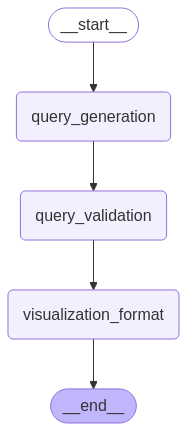

TypeError: query_validation() takes 0 positional arguments but 1 was given

In [23]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

graph  = StateGraph(QueryState)

graph.add_node("query_generation", query_generation)
graph.add_node("query_validation", query_validation)
graph.add_node("visualization_format", visualization_format)


graph.add_edge(START, "query_generation")
graph.add_edge("query_generation", "query_validation")
graph.add_edge("query_validation", "visualization_format")
graph.add_edge("visualization_format",END)

app = graph.compile()
display(Image(app.get_graph(xray=True).draw_mermaid_png()))

await app.ainvoke({"query":"Who are you "})